<a href="https://colab.research.google.com/github/raisinmee/Kecerdasan-Komputasional/blob/main/Project_Akhir_KK_kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT SECTION

In [ ]:
# Import libraries
from ipywidgets import FileUpload
import os
import io
#drive.mount('/content/drive', force_remount=True)
#os.chdir('/content/drive/MyDrive/Tugas Kecerdasan Komputer Kelompok 10')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import learning_curve as lrc

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#buat upload data csv
from google.colab import files

uploaded =files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [ ]:
import io

file_name = list(uploaded.keys())[0]  # Get the first (and likely only) key
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

# UNDERSTANDING DATA

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## Check Imbalance Data

In [ ]:
data_check = df['Churn'].value_counts()

fig = px.bar(data_check,
             x=data_check.index,
             y=data_check.values,
             color=data_check.index,
             title='Churn',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Churn',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

# PREPROCESSING

## Drop customerID

In [ ]:
df_prep = df.copy()

In [ ]:
df_prep = df_prep.drop(['customerID'], axis = 1)
df_prep.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Handling Missing Value

In [ ]:
df_prep['TotalCharges'] = pd.to_numeric(df_prep.TotalCharges, errors='coerce')
df_prep.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df_prep[np.isnan(df_prep['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df_prep[df_prep['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
df_prep.drop(labels=df_prep[df_prep['tenure'] == 0].index, axis=0, inplace=True)
df_prep[df_prep['tenure'] == 0].index

Index([], dtype='int64')

In [ ]:
df_prep.fillna(df_prep["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df_prep.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## Feature Encoding

In [ ]:
df_prep["SeniorCitizen"]= df_prep["SeniorCitizen"].map({0: "No", 1: "Yes"})
df_prep.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_prep["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_prep[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
df_prep.isna().sum().sort_values(ascending=False)

,0
gender,0
SeniorCitizen,0
TotalCharges,0
MonthlyCharges,0
PaymentMethod,0
PaperlessBilling,0
Contract,0
StreamingMovies,0
StreamingTV,0
TechSupport,0


# MODELING

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df_prep = df_prep.apply(lambda x: object_to_int(x))
df_prep.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df_prep.to_csv('Telco-encoding-dataset.csv', index=False)
files.download('Telco-encoding-dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(14,7))
df_prep.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


<Figure size 1400x700 with 0 Axes>

## Splitting dataset

In [ ]:
X = df_prep.drop(columns = ['Churn'])
y = df_prep['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<ipython-input-28-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

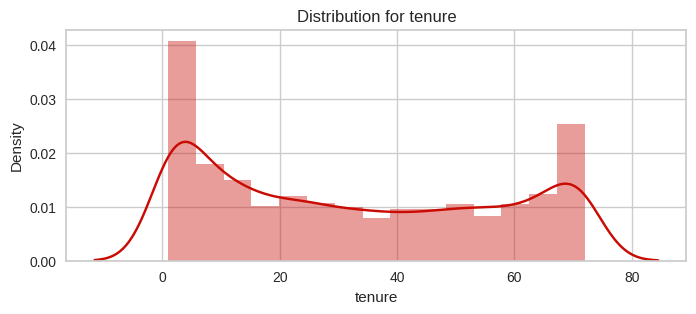

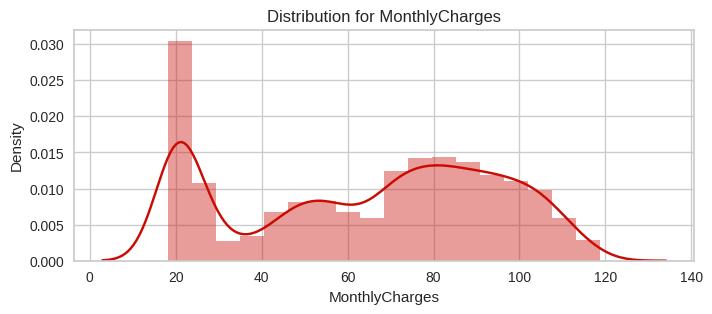

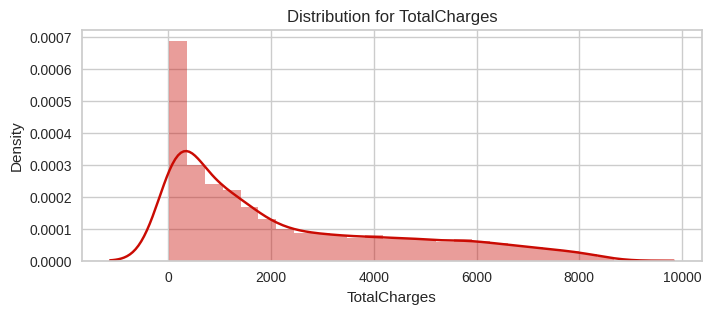

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df_prep)

<ipython-input-28-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

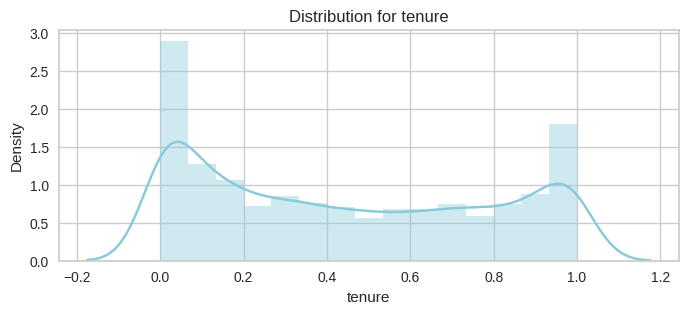

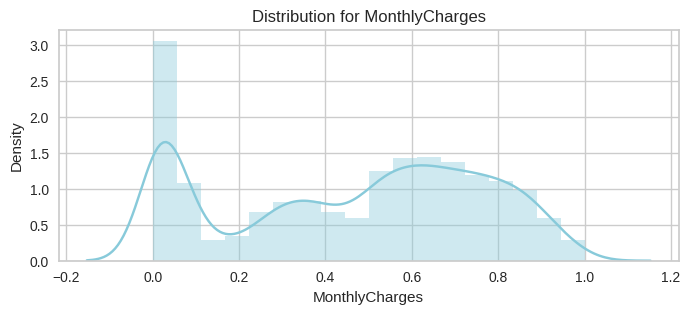

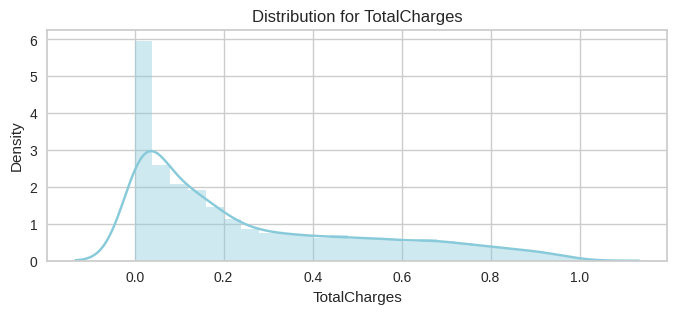

In [ ]:
df_std = pd.DataFrame(MinMaxScaler().fit_transform(df_prep[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## SVM

In [ ]:
SVM = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = SVM.predict(X_test)

Accuracy: 0.7971563981042654
Confusion Matrix:
[[1382  167]
 [ 261  300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



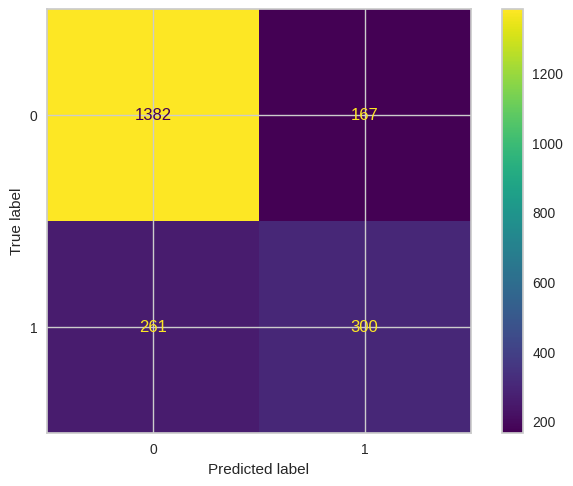

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

Accuracy: 0.7843601895734598
Confusion Matrix:
[[1386  163]
 [ 292  269]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



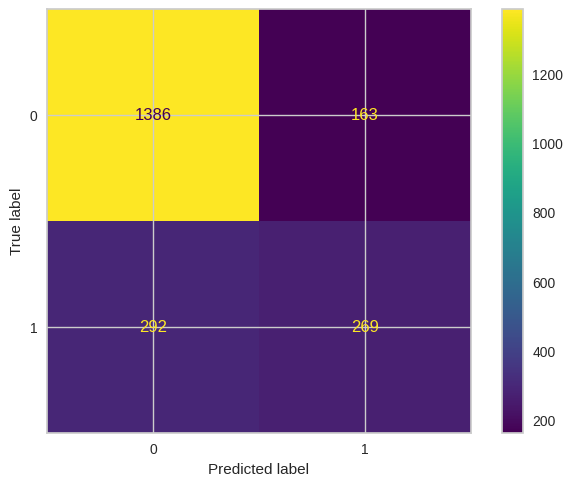

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy2}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

Accuracy: 0.7502369668246446
Confusion Matrix:
[[1285  264]
 [ 263  298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.53      0.53      0.53       561

    accuracy                           0.75      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.75      0.75      0.75      2110



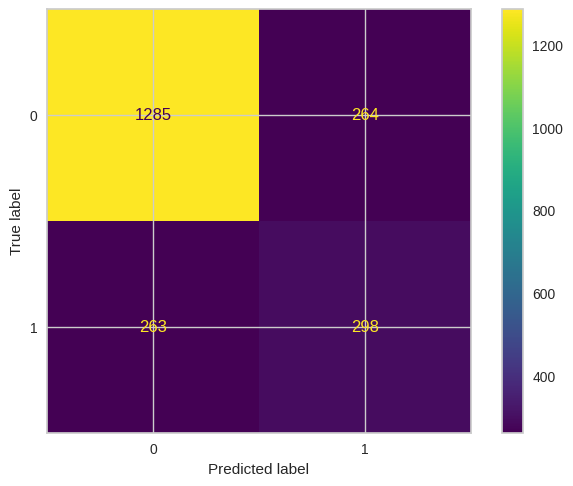

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy3}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## XgBoost

In [ ]:
xgb = xgb.XGBClassifier(
    use_label_encoder=False,  # Disable deprecated label encoder
    eval_metric='mlogloss',   # Multiclass log loss metric
    n_estimators=100,         # Number of trees
    learning_rate=0.1,        # Learning rate
    max_depth=3,              # Maximum tree depth
    random_state=42
)

In [ ]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[11:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb.predict(X_test)

Accuracy: 0.79478672985782
Confusion Matrix:
[[1397  152]
 [ 281  280]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110



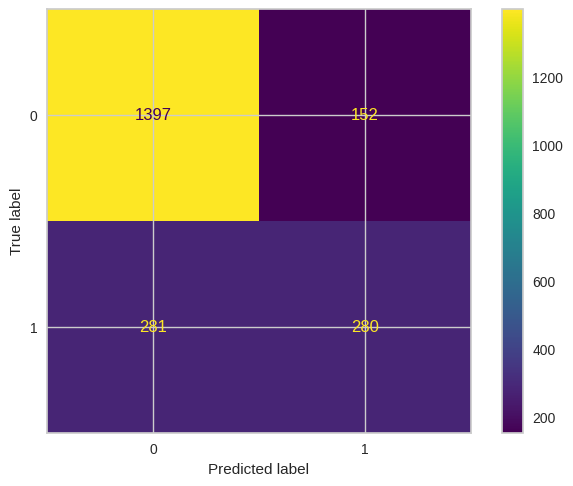

In [ ]:
accuracy4 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy4}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Comparison

In [ ]:
model = ["SVM", "RandomForest", "KNN", "XgBoost"]
accuracy = [accuracy1, accuracy2, accuracy3, accuracy4]

In [ ]:
result = pd.DataFrame()
result['Model'] = model
result['Accuracy'] = accuracy
result.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
0,SVM,0.797156
3,XgBoost,0.794787
1,RandomForest,0.784360
2,KNN,0.750237


# Hyperparameter Tuning ABC

## RandomForest

In [ ]:
class ABC_RF_Optimizer:
    def __init__(self, n_bees=30, max_iterations=50, patience=20, min_improvement=0.001):
        """
        Inisialisasi ABC Optimizer untuk Random Forest

        Parameters:
        n_bees: jumlah lebah
        max_iterations: maksimum iterasi
        patience: jumlah iterasi untuk early stopping
        min_improvement: minimal improvement untuk early stopping
        """
        # Parameter bounds untuk Random Forest
        self.param_bounds = {
            'n_estimators': (50, 300),
            'max_depth': (3, 20),
            'min_samples_split': (2, 10),
            'min_samples_leaf': (1, 5)
        }

        self.n_bees = n_bees
        self.max_iterations = max_iterations
        self.patience = patience
        self.min_improvement = min_improvement

        self.solutions = []
        self.fitness = []
        self.trials = np.zeros(n_bees)
        self.limit = n_bees * len(self.param_bounds)

    def initialize_population(self):
        """Inisialisasi populasi lebah"""
        self.solutions = []
        for _ in range(self.n_bees):
            solution = {
                'n_estimators': random.randint(
                    self.param_bounds['n_estimators'][0],
                    self.param_bounds['n_estimators'][1]
                ),
                'max_depth': random.randint(
                    self.param_bounds['max_depth'][0],
                    self.param_bounds['max_depth'][1]
                ),
                'min_samples_split': random.randint(
                    self.param_bounds['min_samples_split'][0],
                    self.param_bounds['min_samples_split'][1]
                ),
                'min_samples_leaf': random.randint(
                    self.param_bounds['min_samples_leaf'][0],
                    self.param_bounds['min_samples_leaf'][1]
                )
            }
            self.solutions.append(solution)

    def evaluate_fitness(self, solution, X, y):
        """Evaluasi fitness menggunakan cross validation"""
        model = RandomForestClassifier(
            n_estimators=solution['n_estimators'],
            max_depth=solution['max_depth'],
            min_samples_split=solution['min_samples_split'],
            min_samples_leaf=solution['min_samples_leaf'],
            random_state=42
        )
        # Gunakan f1 score sebagai metrik
        scores = cross_val_score(model, X, y, cv=5, scoring='f1')
        return np.mean(scores)

    def modify_solution(self, solution):
        """Modifikasi satu parameter secara random"""
        new_solution = solution.copy()
        # Pilih parameter random untuk dimodifikasi
        param = random.choice(list(self.param_bounds.keys()))

        # Modifikasi parameter terpilih
        if param == 'n_estimators':
            new_solution[param] = random.randint(
                self.param_bounds['n_estimators'][0],
                self.param_bounds['n_estimators'][1]
            )
        elif param == 'max_depth':
            new_solution[param] = random.randint(
                self.param_bounds['max_depth'][0],
                self.param_bounds['max_depth'][1]
            )
        elif param == 'min_samples_split':
            new_solution[param] = random.randint(
                self.param_bounds['min_samples_split'][0],
                self.param_bounds['min_samples_split'][1]
            )
        elif param == 'min_samples_leaf':
            new_solution[param] = random.randint(
                self.param_bounds['min_samples_leaf'][0],
                self.param_bounds['min_samples_leaf'][1]
            )

        return new_solution

    def optimize(self, X, y):
        """Proses optimasi utama"""
        # Inisialisasi populasi
        self.initialize_population()

        # Evaluasi fitness awal
        self.fitness = [self.evaluate_fitness(solution, X, y)
                       for solution in self.solutions]

        best_solution = None
        best_fitness = -np.inf
        no_improvement_count = 0
        best_fitness_so_far = -np.inf

        # Untuk plotting
        fitness_history = []

        for iteration in range(self.max_iterations):
            print(f"\nIterasi {iteration+1}/{self.max_iterations}")

            # Fase Employed Bees
            for i in range(self.n_bees):
                new_solution = self.modify_solution(self.solutions[i])
                new_fitness = self.evaluate_fitness(new_solution, X, y)

                if new_fitness > self.fitness[i]:
                    self.solutions[i] = new_solution
                    self.fitness[i] = new_fitness
                    self.trials[i] = 0
                else:
                    self.trials[i] += 1

            # Fase Onlooker Bees
            probabilities = self.fitness / np.sum(self.fitness)
            for _ in range(self.n_bees):
                selected = np.random.choice(range(self.n_bees), p=probabilities)
                new_solution = self.modify_solution(self.solutions[selected])
                new_fitness = self.evaluate_fitness(new_solution, X, y)

                if new_fitness > self.fitness[selected]:
                    self.solutions[selected] = new_solution
                    self.fitness[selected] = new_fitness
                    self.trials[selected] = 0
                else:
                    self.trials[selected] += 1

            # Fase Scout Bees
            for i in range(self.n_bees):
                if self.trials[i] >= self.limit:
                    self.solutions[i] = {
                        'n_estimators': random.randint(
                            self.param_bounds['n_estimators'][0],
                            self.param_bounds['n_estimators'][1]
                        ),
                        'max_depth': random.randint(
                            self.param_bounds['max_depth'][0],
                            self.param_bounds['max_depth'][1]
                        ),
                        'min_samples_split': random.randint(
                            self.param_bounds['min_samples_split'][0],
                            self.param_bounds['min_samples_split'][1]
                        ),
                        'min_samples_leaf': random.randint(
                            self.param_bounds['min_samples_leaf'][0],
                            self.param_bounds['min_samples_leaf'][1]
                        )
                    }
                    self.fitness[i] = self.evaluate_fitness(self.solutions[i], X, y)
                    self.trials[i] = 0

            # Update solusi terbaik
            current_best = np.argmax(self.fitness)
            if self.fitness[current_best] > best_fitness:
                best_fitness = self.fitness[current_best]
                best_solution = self.solutions[current_best]

            # Catat history
            fitness_history.append(best_fitness)

            print(f"Best fitness: {best_fitness:.4f}")
            print("Best parameters:", best_solution)

            # Early stopping check
            if best_fitness > best_fitness_so_far * (1 + self.min_improvement):
                best_fitness_so_far = best_fitness
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= self.patience:
                print(f"\nEarly stopping at iteration {iteration+1}")
                break

        return best_solution, best_fitness, fitness_history

# Contoh penggunaan
if __name__ == "__main__":

    # Buat data sintesis untuk contoh
    X, y = make_classification(n_samples=1000, n_features=20,
                             n_informative=5, n_redundant=5,
                             random_state=42)

    # Standarisasi fitur
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Inisialisasi optimizer
    optimizer = ABC_RF_Optimizer(
        n_bees=30,
        max_iterations=50,
        patience=20,
        min_improvement=0.001
    )

    # Jalankan optimasi
    best_params, best_score, history = optimizer.optimize(X, y)

    print("\nHasil Optimasi Final:")
    print("Best Parameters:", best_params)
    print(f"Best F1 Score: {best_score:.4f}")


Iterasi 1/50
Best fitness: 0.9332
Best parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}

Iterasi 2/50
Best fitness: 0.9332
Best parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}

Iterasi 3/50
Best fitness: 0.9332
Best parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}

Iterasi 4/50
Best fitness: 0.9332
Best parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}

Iterasi 5/50
Best fitness: 0.9332
Best parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}

Iterasi 6/50
Best fitness: 0.9332
Best parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}

Iterasi 7/50
Best fitness: 0.9332
Best parameters: {'n_estimators': 95, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}

Iterasi 8/50
Best fitness: 0.9332
Best p

In [ ]:
# Evaluasi pada data testing
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

## SVM

In [ ]:
from sklearn.pipeline import Pipeline

class ABC_SVM_Optimizer:
    def __init__(self, n_bees=30, max_iterations=50, patience=20, min_improvement=0.001):
        """
        Inisialisasi ABC Optimizer untuk SVM
        """
        self.param_bounds = {
            'C': (0.1, 100),           # Parameter regularisasi
            'gamma': (0.001, 10),      # Koefisien kernel
            'degree': (2, 5)           # Derajat untuk kernel polynomial
        }

        self.n_bees = n_bees
        self.max_iterations = max_iterations
        self.patience = patience
        self.min_improvement = min_improvement

        self.solutions = []
        self.fitness = []
        self.trials = np.zeros(n_bees)
        self.limit = n_bees * len(self.param_bounds)

    def initialize_population(self):
        """Inisialisasi populasi lebah"""
        self.solutions = []
        for _ in range(self.n_bees):
            solution = {
                'C': random.uniform(*self.param_bounds['C']),
                'gamma': random.uniform(*self.param_bounds['gamma']),
                'degree': random.randint(*self.param_bounds['degree'])
            }
            self.solutions.append(solution)

    def evaluate_fitness(self, solution, X, y, kernel='rbf'):
        """
        Evaluasi fitness menggunakan cross-validation
        """
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(
                C=solution['C'],
                gamma=solution['gamma'],
                degree=solution.get('degree', 3),
                kernel=kernel,
                random_state=42
            ))
        ])

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
        return np.mean(scores)

    def modify_solution(self, solution):
        """Modifikasi satu parameter secara random"""
        new_solution = solution.copy()
        param = random.choice(list(self.param_bounds.keys()))

        if param == 'degree':
            new_solution[param] = random.randint(*self.param_bounds['degree'])
        else:
            new_solution[param] = random.uniform(*self.param_bounds[param])

        return new_solution

    def optimize(self, X, y, kernel='rbf'):
        """
        Proses optimasi utama
        """
        self.initialize_population()
        self.fitness = [self.evaluate_fitness(solution, X, y, kernel) for solution in self.solutions]

        best_solution = None
        best_fitness = -np.inf
        no_improvement_count = 0
        best_fitness_so_far = -np.inf
        fitness_history = []

        for iteration in range(self.max_iterations):
            print(f"Iterasi {iteration + 1}/{self.max_iterations}")

            # Fase Employed Bees
            for i in range(self.n_bees):
                new_solution = self.modify_solution(self.solutions[i])
                new_fitness = self.evaluate_fitness(new_solution, X, y, kernel)

                if new_fitness > self.fitness[i]:
                    self.solutions[i] = new_solution
                    self.fitness[i] = new_fitness
                    self.trials[i] = 0
                else:
                    self.trials[i] += 1

            # Fase Onlooker Bees
            probabilities = self.fitness / np.sum(self.fitness)
            for _ in range(self.n_bees):
                selected = np.random.choice(range(self.n_bees), p=probabilities)
                new_solution = self.modify_solution(self.solutions[selected])
                new_fitness = self.evaluate_fitness(new_solution, X, y, kernel)

                if new_fitness > self.fitness[selected]:
                    self.solutions[selected] = new_solution
                    self.fitness[selected] = new_fitness
                    self.trials[selected] = 0
                else:
                    self.trials[selected] += 1

            # Fase Scout Bees
            for i in range(self.n_bees):
                if self.trials[i] >= self.limit:
                    self.solutions[i] = {
                        'C': random.uniform(*self.param_bounds['C']),
                        'gamma': random.uniform(*self.param_bounds['gamma']),
                        'degree': random.randint(*self.param_bounds['degree'])
                    }
                    self.fitness[i] = self.evaluate_fitness(self.solutions[i], X, y, kernel)
                    self.trials[i] = 0

            # Update solusi terbaik
            current_best = np.argmax(self.fitness)
            if self.fitness[current_best] > best_fitness:
                best_fitness = self.fitness[current_best]
                best_solution = self.solutions[current_best]

            fitness_history.append(best_fitness)

            print(f"Best fitness so far: {best_fitness:.4f}")
            print("Best parameters:", best_solution)

            # Early stopping
            if best_fitness > best_fitness_so_far * (1 + self.min_improvement):
                best_fitness_so_far = best_fitness
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= self.patience:
                print(f"\nEarly stopping at iteration {iteration + 1}")
                break

        return best_solution, best_fitness

# Contoh Penggunaan
if __name__ == "__main__":

    # Data Sintesis
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, random_state=42)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    # Inisialisasi optimizer
    optimizer = ABC_SVM_Optimizer(n_bees=30, max_iterations=50, patience=20, min_improvement=0.001)

    # Optimasi SVM
    best_params, best_fitness = optimizer.optimize(X_train, y_train, kernel='rbf')

    print("\nHasil Akhir:")
    print("Best Parameters:", best_params)
    print(f"Best Fitness: {best_fitness:.4f}")

Iterasi 1/50
Best fitness so far: 0.8529
Best parameters: {'C': 5.696468274938099, 'gamma': 0.12581862514997283, 'degree': 4}
Iterasi 2/50
Best fitness so far: 0.8529
Best parameters: {'C': 5.696468274938099, 'gamma': 0.12581862514997283, 'degree': 4}
Iterasi 3/50
Best fitness so far: 0.8529
Best parameters: {'C': 5.696468274938099, 'gamma': 0.12581862514997283, 'degree': 4}
Iterasi 4/50
Best fitness so far: 0.8629
Best parameters: {'C': 5.1561787783480755, 'gamma': 0.06779659362835003, 'degree': 5}
Iterasi 5/50
Best fitness so far: 0.8629
Best parameters: {'C': 5.1561787783480755, 'gamma': 0.06779659362835003, 'degree': 5}
Iterasi 6/50
Best fitness so far: 0.8629
Best parameters: {'C': 5.1561787783480755, 'gamma': 0.06779659362835003, 'degree': 5}
Iterasi 7/50
Best fitness so far: 0.8629
Best parameters: {'C': 5.1561787783480755, 'gamma': 0.06779659362835003, 'degree': 5}
Iterasi 8/50
Best fitness so far: 0.8629
Best parameters: {'C': 5.1561787783480755, 'gamma': 0.06779659362835003, 

In [ ]:
# Buat model final dengan parameter terbaik
final_model = SVC(
    C=best_params['C'],
    kernel='rbf',
    gamma=best_params['gamma'],
    random_state=42,
    probability=True
)

## KNN

In [ ]:
class ABC_KNN_Optimizer:
    def __init__(self, n_bees=30, max_iterations=50, patience=20, min_improvement=0.001):
        """
        Artificial Bee Colony untuk KNN
        """
        self.param_bounds = {
            'n_neighbors': (1, 30),  # Jumlah tetangga
            'weights': ['uniform', 'distance'],  # Skema pembobotan
            'metric': ['euclidean', 'manhattan', 'minkowski']  # Metrik jarak
        }

        self.n_bees = n_bees
        self.max_iterations = max_iterations
        self.patience = patience
        self.min_improvement = min_improvement

        self.solutions = []
        self.fitness = []
        self.trials = np.zeros(n_bees)
        self.limit = n_bees * len(self.param_bounds)

    def initialize_population(self):
        """Inisialisasi populasi lebah"""
        self.solutions = []
        for _ in range(self.n_bees):
            solution = {
                'n_neighbors': random.randint(
                    self.param_bounds['n_neighbors'][0],
                    self.param_bounds['n_neighbors'][1]
                ),
                'weights': random.choice(self.param_bounds['weights']),
                'metric': random.choice(self.param_bounds['metric'])
            }
            self.solutions.append(solution)

    def evaluate_fitness(self, solution, X, y):
        """
        Evaluasi fitness menggunakan cross-validation
        """
        model = KNeighborsClassifier(
            n_neighbors=solution['n_neighbors'],
            weights=solution['weights'],
            metric=solution['metric']
        )
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
        return np.mean(scores)

    def modify_solution(self, solution):
        """Modifikasi parameter secara random"""
        new_solution = solution.copy()
        param = random.choice(list(self.param_bounds.keys()))

        if param == 'n_neighbors':
            new_solution[param] = random.randint(
                self.param_bounds['n_neighbors'][0],
                self.param_bounds['n_neighbors'][1]
            )
        elif param == 'weights':
            new_solution[param] = random.choice(self.param_bounds['weights'])
        elif param == 'metric':
            new_solution[param] = random.choice(self.param_bounds['metric'])

        return new_solution

    def optimize(self, X, y):
        """
        Proses optimasi utama
        """
        self.initialize_population()
        self.fitness = [self.evaluate_fitness(solution, X, y) for solution in self.solutions]

        best_solution = None
        best_fitness = -np.inf
        no_improvement_count = 0
        best_fitness_so_far = -np.inf
        fitness_history = []

        for iteration in range(self.max_iterations):
            print(f"Iterasi {iteration + 1}/{self.max_iterations}")

            # Fase Employed Bees
            for i in range(self.n_bees):
                new_solution = self.modify_solution(self.solutions[i])
                new_fitness = self.evaluate_fitness(new_solution, X, y)

                if new_fitness > self.fitness[i]:
                    self.solutions[i] = new_solution
                    self.fitness[i] = new_fitness
                    self.trials[i] = 0
                else:
                    self.trials[i] += 1

            # Fase Onlooker Bees
            probabilities = self.fitness / np.sum(self.fitness)
            for _ in range(self.n_bees):
                selected = np.random.choice(range(self.n_bees), p=probabilities)
                new_solution = self.modify_solution(self.solutions[selected])
                new_fitness = self.evaluate_fitness(new_solution, X, y)

                if new_fitness > self.fitness[selected]:
                    self.solutions[selected] = new_solution
                    self.fitness[selected] = new_fitness
                    self.trials[selected] = 0
                else:
                    self.trials[selected] += 1

            # Fase Scout Bees
            for i in range(self.n_bees):
                if self.trials[i] >= self.limit:
                    self.solutions[i] = {
                        'n_neighbors': random.randint(
                            self.param_bounds['n_neighbors'][0],
                            self.param_bounds['n_neighbors'][1]
                        ),
                        'weights': random.choice(self.param_bounds['weights']),
                        'metric': random.choice(self.param_bounds['metric'])
                    }
                    self.fitness[i] = self.evaluate_fitness(self.solutions[i], X, y)
                    self.trials[i] = 0

            # Update solusi terbaik
            current_best = np.argmax(self.fitness)
            if self.fitness[current_best] > best_fitness:
                best_fitness = self.fitness[current_best]
                best_solution = self.solutions[current_best]

            fitness_history.append(best_fitness)

            print(f"Best fitness so far: {best_fitness:.4f}")
            print("Best parameters:", best_solution)

            # Early stopping
            if best_fitness > best_fitness_so_far * (1 + self.min_improvement):
                best_fitness_so_far = best_fitness
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= self.patience:
                print(f"\nEarly stopping at iteration {iteration + 1}")
                break

        return best_solution, best_fitness

# Contoh penggunaan
if __name__ == "__main__":

    # Data Sintesis
    X, y = make_classification(n_samples=7032, n_features=20, n_informative=5, random_state=42)

    # Inisialisasi optimizer
    optimizer = ABC_KNN_Optimizer(n_bees=30, max_iterations=50, patience=20, min_improvement=0.001)

    # Optimasi KNN
    best_params, best_fitness = optimizer.optimize(X_train, y_train)

    print("\nHasil Akhir:")
    print("Best Parameters:", best_params)
    print(f"Best Fitness: {best_fitness:.4f}")

    # Evaluasi pada data testing
    best_knn_model = KNeighborsClassifier(
        n_neighbors=best_params['n_neighbors'],
        weights=best_params['weights'],
        metric=best_params['metric']
    )

Iterasi 1/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 2/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 3/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 4/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 5/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 6/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 7/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 8/50
Best fitness so far: 0.8903
Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan'}
Iterasi 9/50
Bes

## XGB

In [ ]:
class ABC_XGB_Optimizer:
    def __init__(self, n_bees=30, max_iterations=50, patience=20, min_improvement=0.001):
        """
        Artificial Bee Colony untuk XGBoost
        """
        self.param_bounds = {
            'n_estimators': (50, 500),        # Jumlah pohon
            'learning_rate': (0.01, 0.3),    # Learning rate
            'max_depth': (3, 10),            # Kedalaman maksimum
            'subsample': (0.5, 1.0),         # Subsample ratio
            'colsample_bytree': (0.5, 1.0)   # Colsample by tree ratio
        }

        self.n_bees = n_bees
        self.max_iterations = max_iterations
        self.patience = patience
        self.min_improvement = min_improvement

        self.solutions = []
        self.fitness = []
        self.trials = np.zeros(n_bees)
        self.limit = n_bees * len(self.param_bounds)

    def initialize_population(self):
        """Inisialisasi populasi lebah"""
        self.solutions = []
        for _ in range(self.n_bees):
            solution = {
                'n_estimators': random.randint(*self.param_bounds['n_estimators']),
                'learning_rate': random.uniform(*self.param_bounds['learning_rate']),
                'max_depth': random.randint(*self.param_bounds['max_depth']),
                'subsample': random.uniform(*self.param_bounds['subsample']),
                'colsample_bytree': random.uniform(*self.param_bounds['colsample_bytree'])
            }
            self.solutions.append(solution)

    def evaluate_fitness(self, solution, X, y):
        """
        Evaluasi fitness menggunakan cross-validation
        """
        model = XGBClassifier(
            n_estimators=solution['n_estimators'],
            learning_rate=solution['learning_rate'],
            max_depth=solution['max_depth'],
            subsample=solution['subsample'],
            colsample_bytree=solution['colsample_bytree'],
            random_state=42,
            eval_metric='logloss'
        )
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
        return np.mean(scores)

    def modify_solution(self, solution):
        """Modifikasi parameter secara random"""
        new_solution = solution.copy()
        param = random.choice(list(self.param_bounds.keys()))

        if param == 'n_estimators' or param == 'max_depth':
            new_solution[param] = random.randint(*self.param_bounds[param])
        else:
            new_solution[param] = random.uniform(*self.param_bounds[param])

        return new_solution

    def optimize(self, X, y):
        """
        Proses optimasi utama
        """
        self.initialize_population()
        self.fitness = [self.evaluate_fitness(solution, X, y) for solution in self.solutions]

        best_solution = None
        best_fitness = -np.inf
        no_improvement_count = 0
        best_fitness_so_far = -np.inf
        fitness_history = []

        for iteration in range(self.max_iterations):
            print(f"Iterasi {iteration + 1}/{self.max_iterations}")

            # Fase Employed Bees
            for i in range(self.n_bees):
                new_solution = self.modify_solution(self.solutions[i])
                new_fitness = self.evaluate_fitness(new_solution, X, y)

                if new_fitness > self.fitness[i]:
                    self.solutions[i] = new_solution
                    self.fitness[i] = new_fitness
                    self.trials[i] = 0
                else:
                    self.trials[i] += 1

            # Fase Onlooker Bees
            probabilities = self.fitness / np.sum(self.fitness)
            for _ in range(self.n_bees):
                selected = np.random.choice(range(self.n_bees), p=probabilities)
                new_solution = self.modify_solution(self.solutions[selected])
                new_fitness = self.evaluate_fitness(new_solution, X, y)

                if new_fitness > self.fitness[selected]:
                    self.solutions[selected] = new_solution
                    self.fitness[selected] = new_fitness
                    self.trials[selected] = 0
                else:
                    self.trials[selected] += 1

            # Fase Scout Bees
            for i in range(self.n_bees):
                if self.trials[i] >= self.limit:
                    self.solutions[i] = {
                        'n_estimators': random.randint(*self.param_bounds['n_estimators']),
                        'learning_rate': random.uniform(*self.param_bounds['learning_rate']),
                        'max_depth': random.randint(*self.param_bounds['max_depth']),
                        'subsample': random.uniform(*self.param_bounds['subsample']),
                        'colsample_bytree': random.uniform(*self.param_bounds['colsample_bytree'])
                    }
                    self.fitness[i] = self.evaluate_fitness(self.solutions[i], X, y)
                    self.trials[i] = 0

            # Update solusi terbaik
            current_best = np.argmax(self.fitness)
            if self.fitness[current_best] > best_fitness:
                best_fitness = self.fitness[current_best]
                best_solution = self.solutions[current_best]

            fitness_history.append(best_fitness)

            print(f"Best fitness so far: {best_fitness:.4f}")
            print("Best parameters:", best_solution)

            # Early stopping
            if best_fitness > best_fitness_so_far * (1 + self.min_improvement):
                best_fitness_so_far = best_fitness
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= self.patience:
                print(f"\nEarly stopping at iteration {iteration + 1}")
                break

        return best_solution, best_fitness

# Contoh penggunaan
if __name__ == "__main__":

    # Data Sintesis
    X, y = make_classification(n_samples=7032, n_features=20, n_informative=5, random_state=42)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    # Inisialisasi optimizer
    optimizer = ABC_XGB_Optimizer(n_bees=30, max_iterations=50, patience=20, min_improvement=0.001)

    # Optimasi XGBoost
    best_params, best_fitness = optimizer.optimize(X_train, y_train)

    print("\nHasil Akhir:")
    print("Best Parameters:", best_params)
    print(f"Best Fitness: {best_fitness:.4f}")

    # Evaluasi pada data testing
    best_xgb_model = XGBClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        random_state=42,
        eval_metric='logloss'
    )

Iterasi 1/50
Best fitness so far: 0.9190
Best parameters: {'n_estimators': 323, 'learning_rate': 0.08556322896028254, 'max_depth': 8, 'subsample': 0.7010987193982969, 'colsample_bytree': 0.6998826892213805}
Iterasi 2/50
Best fitness so far: 0.9190
Best parameters: {'n_estimators': 323, 'learning_rate': 0.08556322896028254, 'max_depth': 8, 'subsample': 0.7010987193982969, 'colsample_bytree': 0.6998826892213805}
Iterasi 3/50
Best fitness so far: 0.9195
Best parameters: {'n_estimators': 182, 'learning_rate': 0.2333542342761305, 'max_depth': 7, 'subsample': 0.9261206957109114, 'colsample_bytree': 0.8853161956259732}
Iterasi 4/50
Best fitness so far: 0.9201
Best parameters: {'n_estimators': 302, 'learning_rate': 0.08556322896028254, 'max_depth': 8, 'subsample': 0.8817707697142135, 'colsample_bytree': 0.6998826892213805}
Iterasi 5/50
Best fitness so far: 0.9201
Best parameters: {'n_estimators': 302, 'learning_rate': 0.08556322896028254, 'max_depth': 8, 'subsample': 0.8817707697142135, 'colsa

# MODEL EVALUATION

In [ ]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=63, random_state=42)

In [ ]:
y_pred = best_rf_model.predict(X_test)

Accuracy: 0.9133333333333333
Confusion Matrix:
[[130  20]
 [  6 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       150
           1       0.88      0.96      0.92       150

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



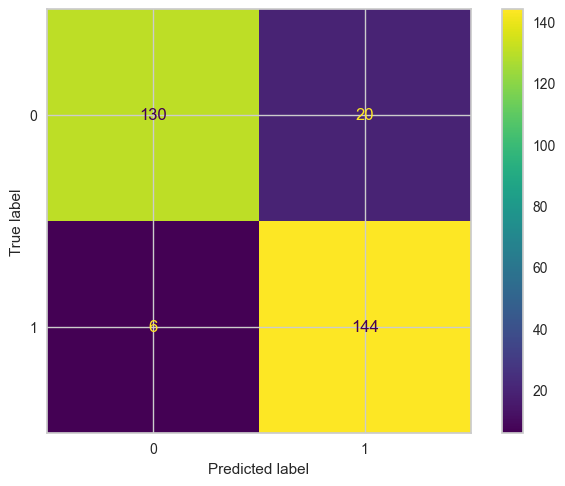

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy2}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## SVM

In [ ]:
final_model.fit(X_train, y_train)

SVC(C=1.6415519251528847, gamma=0.02380890481731455, probability=True,
    random_state=42)

In [ ]:
y_pred = final_model.predict(X_test)

Accuracy: 0.8766666666666667
Confusion Matrix:
[[123  27]
 [ 10 140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       150
           1       0.84      0.93      0.88       150

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



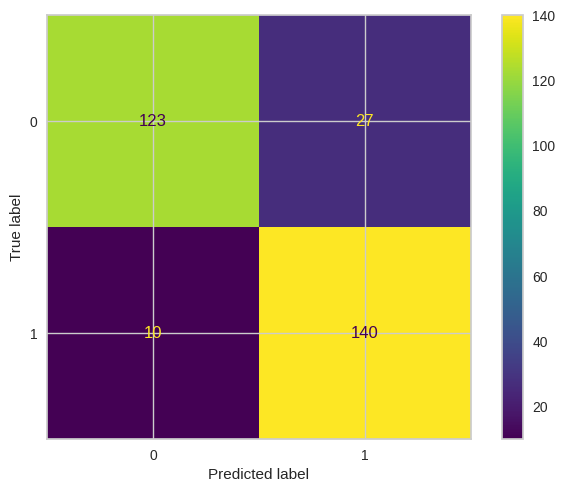

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## RF

In [ ]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=56, random_state=42)

In [ ]:
y_pred = best_rf_model.predict(X_test)

Accuracy: 0.9146919431279621
Confusion Matrix:
[[968  87]
 [ 93 962]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1055
           1       0.92      0.91      0.91      1055

    accuracy                           0.91      2110
   macro avg       0.91      0.91      0.91      2110
weighted avg       0.91      0.91      0.91      2110



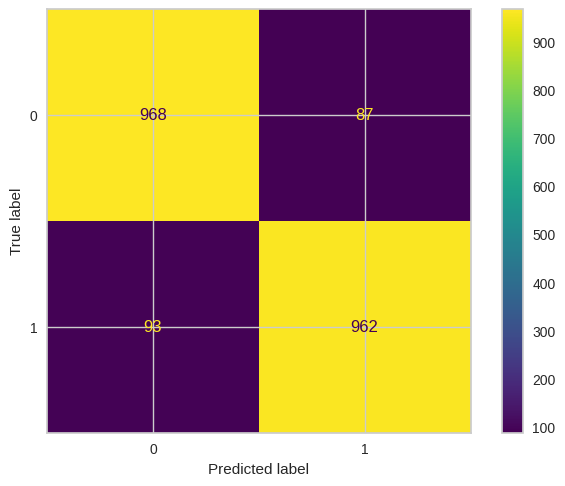

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy2}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## KNN

In [ ]:
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [ ]:
y_pred = best_knn_model.predict(X_test)

Accuracy: 0.8533333333333334
Confusion Matrix:
[[130  20]
 [ 24 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       150
           1       0.86      0.84      0.85       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



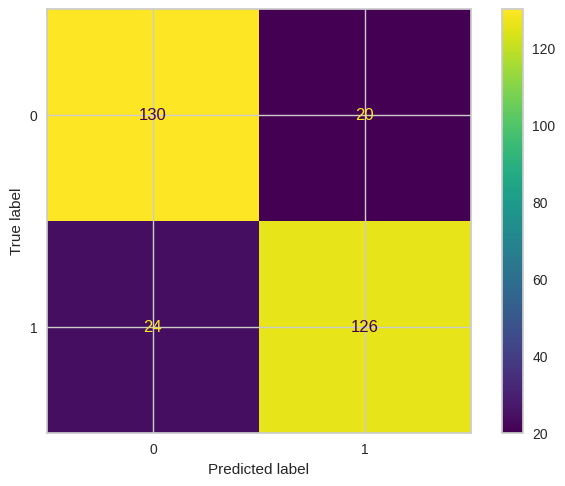

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy3}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## XGB

In [ ]:
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.951236220536619, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06519261999238765,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=211, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = best_xgb_model.predict(X_test)

Accuracy: 0.933175355450237
Confusion Matrix:
[[984  71]
 [ 70 985]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1055
           1       0.93      0.93      0.93      1055

    accuracy                           0.93      2110
   macro avg       0.93      0.93      0.93      2110
weighted avg       0.93      0.93      0.93      2110



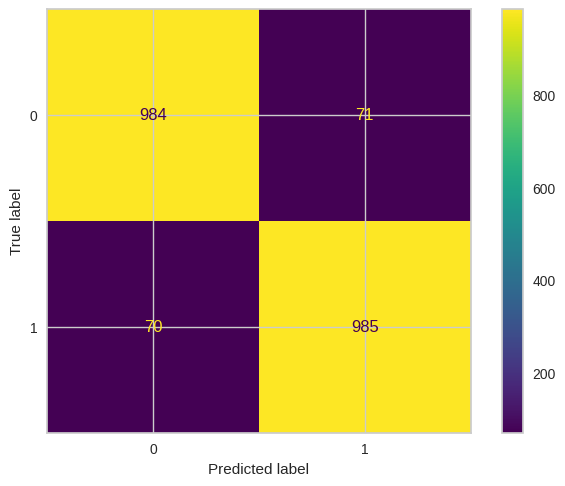

In [ ]:
accuracy4 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy4}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Compare result

In [ ]:
model = ["SVM", "RandomForest", "KNN", "XGB"]
accuracy = [accuracy1, accuracy2, accuracy3, accuracy4]

In [ ]:
hasil_tuning = pd.DataFrame()
hasil_tuning['Model'] = model
hasil_tuning['Accuracy'] = accuracy
hasil_tuning.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
3,XGB,0.933175
1,RandomForest,0.914692
0,SVM,0.876667
2,KNN,0.853333
